In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

import torch
torch.manual_seed(0)

import tensorflow as tf
from neural_circuits.LRRNN import get_W_eigs_np, get_W_eigs_tf, \
                                  load_ME_EPI_LRRNN, load_best_SNPE_LRRNN, \
                                  get_simulator, get_epi_times, \
                                  get_snpe_times, SNPE_entropy,\
                                  tf_num_params, torch_num_params, eig_scatter, \
                                  plot_compare_hp

import warnings
warnings.filterwarnings('ignore')

"""RNN stable amplification."""

'RNN stable amplification.'

## Supp Fig 3

In [2]:
# SNPE setup
snpe_base_path = os.path.join("data", "snpe")
colors = sns.color_palette()
orange_pal = sns.color_palette("Oranges_r")
x0 = np.array([0.5, 1.5])
num_transforms = 3
g = 0.01
K = 1

# EPI setup
J_eig_realmax_mean = 0.5
Js_eig_max_mean = 1.5
eig_std = 0.25
mu = np.array([J_eig_realmax_mean,
               Js_eig_max_mean,
               eig_std**2,
               eig_std**2], dtype=np.float32)



## Comparison at N=50

In [3]:
N = 50
num_sims = [5000, 25000]
num_batches = [200]
num_atoms = [100]

len_sims = len(num_sims)
len_batches = len(num_batches)
random_seeds = [1,2,3,4,5]

SNPE_all = {}
EPI_all = {}
for i, _num_sims in enumerate(num_sims):
    for j, _num_batch in enumerate(num_batches):
        for k, _num_atoms in enumerate(num_atoms):
            for rs in random_seeds:
                snpe_optim = load_best_SNPE_LRRNN(N, g, K, x0,
                                                  num_sims=_num_sims, 
                                                  num_batch=_num_batch, 
                                                  num_atoms=_num_atoms,
                                                  random_seeds=[rs])
                SNPE_all.update({(_num_sims, _num_batch, _num_atoms, rs):snpe_optim})

                if i == 0:
                    epi_optim, epi_df = load_ME_EPI_LRRNN(N, g, K, mu, random_seeds=[rs], \
                                                          return_df=True, by_df=True)
                    if (epi_optim is None):
                        print("None at ", rs)
                    EPI_all.update({rs:{'optim':epi_optim, 'df':epi_df}})

Processing SNPE N=50, g =0.01, rs=1.
Processing EPI: D=200, rs=1.

Processing SNPE N=50, g =0.01, rs=2.
Processing EPI: D=200, rs=2.

Processing SNPE N=50, g =0.01, rs=3.
Processing EPI: D=200, rs=3.

Processing SNPE N=50, g =0.01, rs=4.
Processing EPI: D=200, rs=4.

Processing SNPE N=50, g =0.01, rs=5.
Processing EPI: D=200, rs=5.

Processing SNPE N=50, g =0.01, rs=1.
Processing SNPE N=50, g =0.01, rs=2.
Processing SNPE N=50, g =0.01, rs=3.
Processing SNPE N=50, g =0.01, rs=4.
Processing SNPE N=50, g =0.01, rs=5.


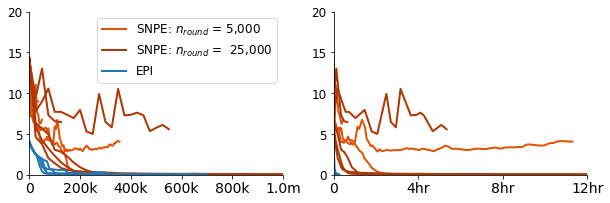

In [4]:
oranges = [orange_pal[1], orange_pal[0]]
num_batch = 200
num_atoms = 100
epis, snpe1s, snpe2s = [], [], []
for _i, rs in enumerate(random_seeds):
    if (_num_sims, num_batch, num_atoms, rs) in SNPE_all:
        snpe1s.append(SNPE_all[(5000,num_batch,_num_atoms, rs)])
        snpe2s.append(SNPE_all[(25000,num_batch,_num_atoms, rs)])
        
    epis.append(EPI_all[rs])
    
epi_label = r"EPI"
snpe1_label = r"SNPE: $n_{round}$ = 5,000"
snpe2_label = r"SNPE: $n_{round}$ =  25,000"
fig, axs = plot_compare_hp(epis, snpe1s, snpe2s, colors[0], oranges,
                epi_label, snpe1_label, snpe2_label, xlims=[1e6, 12*60], fontsize=14)
plt.savefig(os.path.join("figures", "figRNN3",  "ScalingSNPE_N=50.png"))


## $n_{atoms}$ Comparison at N=100

In [5]:
N = 100
num_sims = [25000]
num_batches = [1000]
num_atoms = [1000, 100]
SNPE_all = {}
EPI_all = {}
for i, _num_sims in enumerate(num_sims):
    for j, _num_batch in enumerate(num_batches):
        for k, _num_atoms in enumerate(num_atoms):
            for rs in random_seeds:
                snpe_optim = load_best_SNPE_LRRNN(N, g, K, x0,
                                                  num_sims=_num_sims, 
                                                  num_batch=_num_batch, 
                                                  num_atoms=_num_atoms,
                                                  random_seeds=[rs])
                SNPE_all.update({(_num_sims, _num_batch, _num_atoms, rs):snpe_optim})

                epi_optim, epi_df = load_ME_EPI_LRRNN(N, g, K, mu, random_seeds=[rs], \
                                                      return_df=True, by_df=True)
                EPI_all.update({rs:{'optim':epi_optim, 'df':epi_df}})

Processing SNPE N=100, g =0.01, rs=1.
Processing EPI: D=400, rs=1.

Processing SNPE N=100, g =0.01, rs=2.
Processing EPI: D=400, rs=2.

Processing SNPE N=100, g =0.01, rs=3.
Processing EPI: D=400, rs=3.

Processing SNPE N=100, g =0.01, rs=4.
Processing EPI: D=400, rs=4.

Processing SNPE N=100, g =0.01, rs=5.
Processing EPI: D=400, rs=5.

Processing SNPE N=100, g =0.01, rs=1.
Processing EPI: D=400, rs=1.

Processing SNPE N=100, g =0.01, rs=2.
Processing EPI: D=400, rs=2.

Processing SNPE N=100, g =0.01, rs=3.
Processing EPI: D=400, rs=3.

Processing SNPE N=100, g =0.01, rs=4.
Processing EPI: D=400, rs=4.

Processing SNPE N=100, g =0.01, rs=5.
Processing EPI: D=400, rs=5.



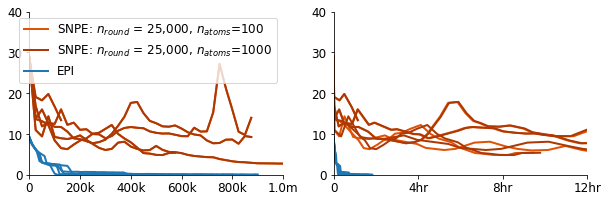

In [6]:
num_sims = 25000
num_batch = 1000
epis, snpe1s, snpe2s = [], [], []
for _i, rs in enumerate(random_seeds):
    if (num_sims, num_batch, 100, rs) in SNPE_all:
        snpe1s.append(SNPE_all[(num_sims, num_batch,1000, rs)])
    if (num_sims, num_batch, 1000, rs) in SNPE_all:
        snpe2s.append(SNPE_all[(num_sims, num_batch,100, rs)])
        
    epis.append(EPI_all[rs])
    
orange_pal = sns.color_palette("Oranges_r")

epi_label = r"EPI"
snpe1_label = r"SNPE: $n_{round}$ = 25,000, $n_{atoms}$=100"
snpe2_label = r"SNPE: $n_{round}$ = 25,000, $n_{atoms}$=1000"
plot_compare_hp(epis, snpe1s, snpe2s, colors[0], oranges, 
                epi_label, snpe1_label, snpe2_label, xlims=[1e6, 12*60])
plt.savefig(os.path.join("figures", "figRNN3",  "ScalingSNPE_N=100_atoms.png"))


## $n_{sims}$ Comparison at N=100

In [7]:
N = 100
num_sims = [25000, 250000]
num_batches = [1000]
num_atoms = [100]
SNPE_all = {}
EPI_all = {}
for i, _num_sims in enumerate(num_sims):
    for j, _num_batch in enumerate(num_batches):
        for k, _num_atoms in enumerate(num_atoms):
            for rs in random_seeds:
                snpe_optim = load_best_SNPE_LRRNN(N, g, K, x0,
                                                  num_sims=_num_sims, 
                                                  num_batch=_num_batch, 
                                                  num_atoms=_num_atoms,
                                                  random_seeds=[rs])
                SNPE_all.update({(_num_sims, _num_batch, _num_atoms, rs):snpe_optim})

                epi_optim, epi_df = load_ME_EPI_LRRNN(N, g, K, mu, random_seeds=[rs], \
                                                      return_df=True, by_df=True)
                EPI_all.update({rs:{'optim':epi_optim, 'df':epi_df}})

Processing SNPE N=100, g =0.01, rs=1.
Processing EPI: D=400, rs=1.

Processing SNPE N=100, g =0.01, rs=2.
Processing EPI: D=400, rs=2.

Processing SNPE N=100, g =0.01, rs=3.
Processing EPI: D=400, rs=3.

Processing SNPE N=100, g =0.01, rs=4.
Processing EPI: D=400, rs=4.

Processing SNPE N=100, g =0.01, rs=5.
Processing EPI: D=400, rs=5.

Processing SNPE N=100, g =0.01, rs=1.
Processing EPI: D=400, rs=1.

Processing SNPE N=100, g =0.01, rs=2.
Processing EPI: D=400, rs=2.

Processing SNPE N=100, g =0.01, rs=3.
Processing EPI: D=400, rs=3.

Processing SNPE N=100, g =0.01, rs=4.
Processing EPI: D=400, rs=4.

Processing SNPE N=100, g =0.01, rs=5.
Processing EPI: D=400, rs=5.



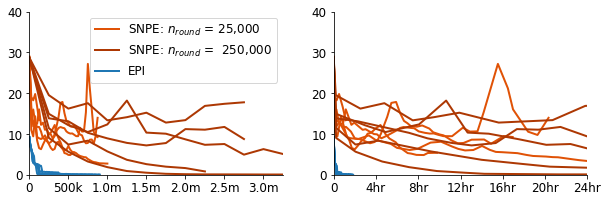

In [10]:
num_batch = 1000
num_atoms = 100
epis, snpe1s, snpe2s = [], [], []
for _i, rs in enumerate(random_seeds):
    if (_num_sims, num_batch, num_atoms, rs) in SNPE_all:
        snpe1s.append(SNPE_all[(25000,num_batch,_num_atoms, rs)])
        snpe2s.append(SNPE_all[(250000,num_batch,_num_atoms, rs)])
        
    epis.append(EPI_all[rs])
    
epi_label = r"EPI"
snpe1_label = r"SNPE: $n_{round}$ = 25,000"
snpe2_label = r"SNPE: $n_{round}$ =  250,000"
plot_compare_hp(epis, snpe1s, snpe2s, colors[0], oranges,
                epi_label, snpe1_label, snpe2_label, xlims=[1e7, 24*60])
plt.savefig(os.path.join("figures", "figRNN3",  "ScalingSNPE_N=100_sims.png"))